In [29]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
df = sns.load_dataset("penguins")
df = df[df["species"] == "Adelie"].dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [31]:
df = df[["bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
df

,bill_depth_mm,flipper_length_mm,body_mass_g
0,18.7,181.0,3750.0
1,17.4,186.0,3800.0
2,18.0,195.0,3250.0
4,19.3,193.0,3450.0
5,20.6,190.0,3650.0
...,...,...,...
147,18.4,184.0,3475.0
148,17.8,195.0,3450.0
149,18.1,193.0,3750.0
150,17.1,187.0,3700.0


In [32]:
px.scatter(df, x = "flipper_length_mm", y = "bill_depth_mm")


In [33]:
x = df["flipper_length_mm"]
y = df["bill_depth_mm"]

x_bar, sigma_x = np.mean(x), np.std(x)
y_bar, sigma_y = np.mean(y), np.std(y)
r = np.sum((x - x_bar) / sigma_x * (y - y_bar) / sigma_y) / len(x)

theta1_hat = r * sigma_y / sigma_x
theta1_hat

0.05812622369506766

In [34]:
theta0_hat = y_bar - theta1_hat * x_bar
theta0_hat

7.297305899612306

In [35]:
df["pred_bill_depth_mm"] = theta0_hat + theta1_hat * df["flipper_length_mm"]
df["residual"] = df["bill_depth_mm"] - df["pred_bill_depth_mm"]
                                          
df

,bill_depth_mm,flipper_length_mm,body_mass_g,pred_bill_depth_mm,residual
0,18.7,181.0,3750.0,17.818152,0.881848
1,17.4,186.0,3800.0,18.108784,-0.708784
2,18.0,195.0,3250.0,18.631920,-0.631920
4,19.3,193.0,3450.0,18.515667,0.784333
5,20.6,190.0,3650.0,18.341288,2.258712
...,...,...,...,...,...
147,18.4,184.0,3475.0,17.992531,0.407469
148,17.8,195.0,3450.0,18.631920,-0.831920
149,18.1,193.0,3750.0,18.515667,-0.415667
150,17.1,187.0,3700.0,18.166910,-1.066910


In [36]:
np.mean(df["residual"]**2)

1.3338778799806374

In [37]:
import plotly.graph_objects as go

scatter_plot = px.scatter(df, x="flipper_length_mm", y="bill_depth_mm")
line_plot = px.line(df, x="flipper_length_mm", y="pred_bill_depth_mm")
line_plot.update_traces(line=dict(color = 'rgba(255, 0, 0)'))

go.Figure(data=scatter_plot.data + line_plot.data)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
X = df[["flipper_length_mm", "body_mass_g"]]
y = df["bill_depth_mm"]
model.fit(X, y)

LinearRegression()

In [40]:
model.predict([[185, 3250.0]]) 

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([17.62312705])

In [41]:
df["sklearn_pred_bill_depth_mm"] = model.predict(df[["flipper_length_mm", "body_mass_g"]])
df

,bill_depth_mm,flipper_length_mm,body_mass_g,pred_bill_depth_mm,residual,sklearn_pred_bill_depth_mm
0,18.7,181.0,3750.0,17.818152,0.881848,18.322561
1,17.4,186.0,3800.0,18.108784,-0.708784,18.445578
2,18.0,195.0,3250.0,18.631920,-0.631920,17.721412
4,19.3,193.0,3450.0,18.515667,0.784333,17.997254
5,20.6,190.0,3650.0,18.341288,2.258712,18.263268
...,...,...,...,...,...,...
147,18.4,184.0,3475.0,17.992531,0.407469,17.945735
148,17.8,195.0,3450.0,18.631920,-0.831920,18.016911
149,18.1,193.0,3750.0,18.515667,-0.415667,18.440503
150,17.1,187.0,3700.0,18.166910,-1.066910,18.307657


In [42]:
model.intercept_ , model.coef_        

(11.002995277447063, array([0.00982849, 0.0014775 ]))

In [43]:
# vs. analytical solutions
theta0_hat, theta1_hat

(7.297305899612306, 0.05812622369506766)

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df["bill_depth_mm"], df["sklearn_pred_bill_depth_mm"])

0.9764070438844

In [46]:
# creating our design matrix.
# Note:
#  - no bias term needed here bc of sklearn's special functionality
#  - now the double-brackets make sense!!
X_2d = df[["flipper_length_mm", "body_mass_g"]]
y = df["bill_depth_mm"]


In [47]:
model_2d = LinearRegression() # note fit_intercept=True by default
model_2d.fit(X_2d, y)

LinearRegression()

In [48]:
df["sklearn_predictions"] = model_2d.predict(X_2d)
model_2d.predict([[185, 3750]]) # why double brackets?

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([18.36187501])

In [49]:
print(f"theta0: {model_2d.intercept_}")
print(f"theta1 and theta2: {model_2d.coef_}")
theta_using_sklearn = [model_2d.intercept_, model_2d.coef_[0], model_2d.coef_[1]]
theta_using_sklearn

theta0: 11.002995277447063
theta1 and theta2: [0.00982849 0.0014775 ]


[11.002995277447063, 0.009828486885248759, 0.001477495908321289]

Text(0.5, 0.5, 'body_mass_g')

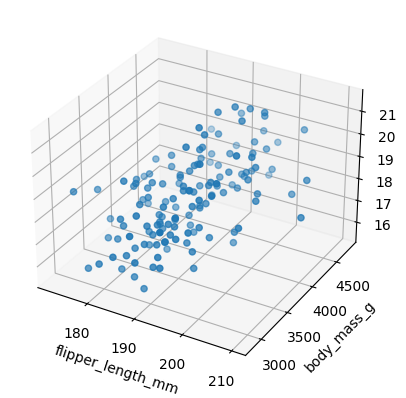

In [51]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["flipper_length_mm"], df["body_mass_g"], df["bill_depth_mm"])
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

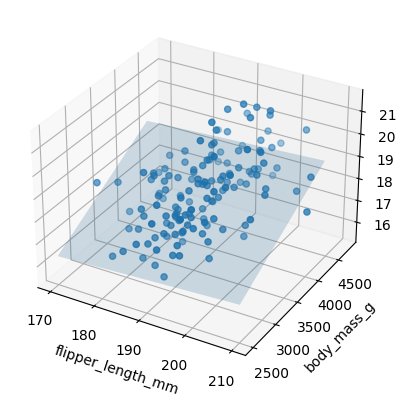

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["flipper_length_mm"], df["body_mass_g"], df["bill_depth_mm"])
xx, yy = np.meshgrid(range(170, 220, 10), range(2500, 4500, 100))
zz = ( 11.0029 + 0.00982 * xx + 0.001477 * yy) # thetas_using_sklearn
ax.plot_surface(xx, yy, zz, alpha=0.2)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.gcf().savefig("plane.png", dpi = 300, bbox_inches = "tight")

In [54]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

x = np.linspace(1, 6.75, 200)
fig = px.line(y = arbitrary(x), x = x)


fig.update_layout(font_size = 16)

In [55]:
from scipy.optimize import minimize

minimize(arbitrary, x0 = 3.5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.13827491292966557
        x: [ 2.393e+00]
      nit: 3
      jac: [ 6.486e-06]
 hess_inv: [[ 7.385e-01]]
     nfev: 20
     njev: 10

In [58]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

simple_minimize(arbitrary, np.linspace(1, 7, 20))

5.421052631578947

In [59]:
xs = np.linspace(1, 7, 200)
sparse_xs = np.linspace(1, 7, 5)

ys = arbitrary(xs)
sparse_ys = arbitrary(sparse_xs)

fig = px.line(x = xs, y = arbitrary(xs))
fig.add_scatter(x = sparse_xs, y = arbitrary(sparse_xs), mode = "markers")
fig.update_layout(showlegend= False)
fig.show()

In [60]:
import plotly.graph_objects as go

def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10


fig = go.Figure()
roots = np.array([2.3927, 3.5309, 5.3263])

fig.add_trace(go.Scatter(x = xs, y = arbitrary(xs), 
                         mode = "lines", name = "f"))
fig.add_trace(go.Scatter(x = xs, y = derivative_arbitrary(xs), 
                         mode = "lines", name = "df", line = {"dash": "dash"}))
fig.add_trace(go.Scatter(x = np.array(roots), y = 0*roots, 
                         mode = "markers", name = "df = zero", marker_size = 12))
fig.update_layout(font_size = 20, yaxis_range=[-1, 3])
fig.show()

In [61]:
import matplotlib.pyplot as plt

def plot_arbitrary():
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 3])
    
def plot_x_on_f(f, x):
    y = f(x)    
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)
    
def plot_x_on_f_empty(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c = 'none', edgecolor=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)    
    
def plot_tangent_on_f(f, x, eps=1e-6):
    slope = ((f(x + eps) - f(x - eps))
             / (2 * eps))
    xs = np.arange(x - 1, x + 1, 0.05)
    ys = f(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')    

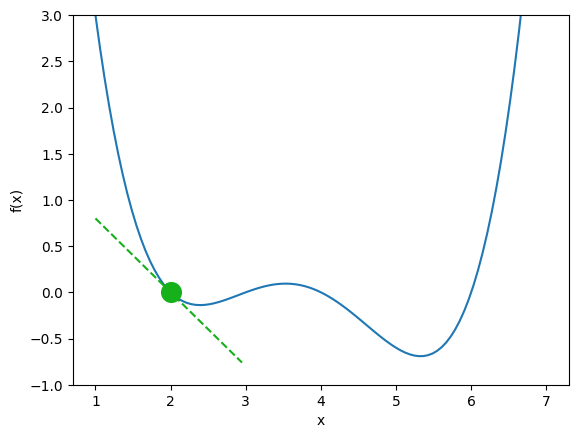

In [64]:
plot_arbitrary()
plot_x_on_f(arbitrary, 2)
plot_tangent_on_f(arbitrary, 2)
plt.xlabel('x')
plt.ylabel('f(x)');

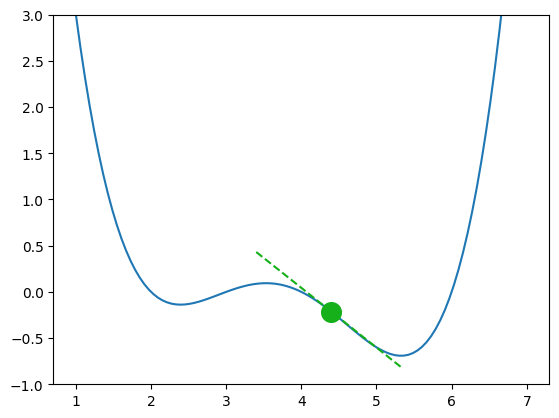

In [65]:
plot_arbitrary()
plot_x_on_f(arbitrary, 4.4)
plot_tangent_on_f(arbitrary, 4.4)

In [72]:
guess = 5.24
print(f"x: {guess}, f(x): {arbitrary(guess)}, derivative f'(x): {derivative_arbitrary(guess)}")

x: 5.24, f(x): -0.6839562239999623, derivative f'(x): -0.16807039999999915


In [83]:
def plot_one_step(x):
    new_x = x - derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')  
    
def plot_one_step_better(x):
    new_x = x - 0.3 * derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')     

old x: 4
new x: 4.4


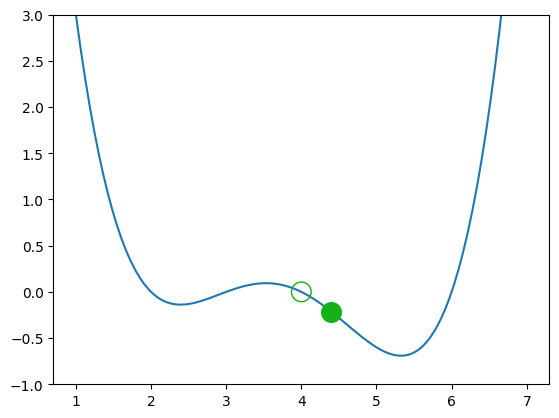

In [78]:
plot_one_step(4)


old x: 4.4
new x: 5.0464000000000055


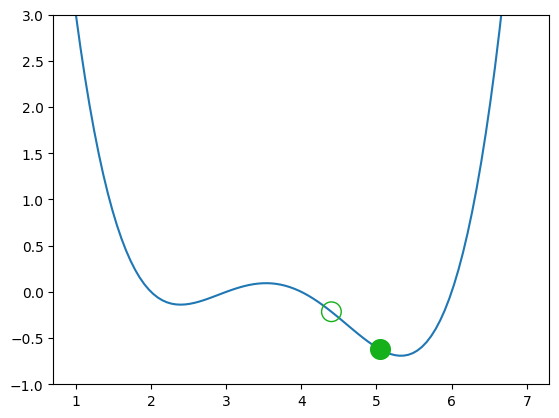

In [79]:
plot_one_step(4.4)


old x: 5.0464000000000055
new x: 5.496730601062393


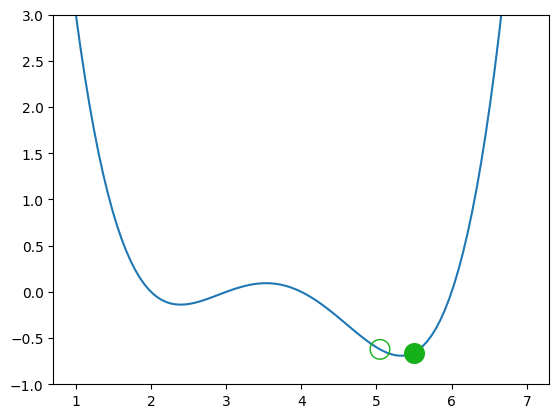

In [80]:
plot_one_step(5.0464000000000055)

old x: 5.496730601062393
new x: 5.0808624852305115


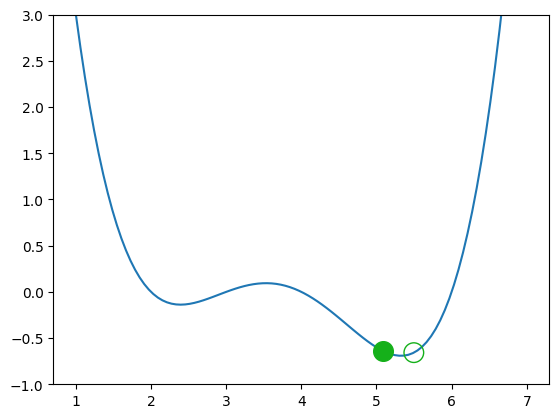

In [81]:
plot_one_step(5.496730601062393)

old x: 5.292481181607487
new x: 5.313239023606622


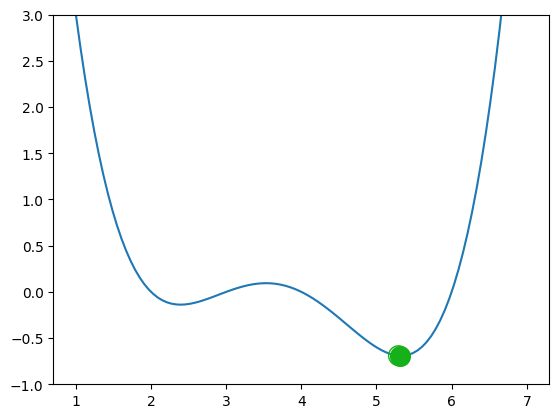

In [88]:
plot_one_step_better(5.292481181607487)

In [89]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

In [90]:
trajectory = gradient_descent(derivative_arbitrary, 4, 0.3, 20)
trajectory

array([4.        , 4.12      , 4.26729664, 4.44272584, 4.64092624,
       4.8461837 , 5.03211854, 5.17201478, 5.25648449, 5.29791149,
       5.31542718, 5.3222606 , 5.32483298, 5.32578765, 5.32614004,
       5.32626985, 5.32631764, 5.32633523, 5.3263417 , 5.32634408])

In [91]:
trajectory = gradient_descent(derivative_arbitrary, 4, 1, 20)
trajectory

array([4.        , 4.4       , 5.0464    , 5.4967306 , 5.08086249,
       5.48998039, 5.09282487, 5.48675539, 5.09847285, 5.48507269,
       5.10140255, 5.48415922, 5.10298805, 5.48365325, 5.10386474,
       5.48336998, 5.1043551 , 5.48321045, 5.10463112, 5.48312031])

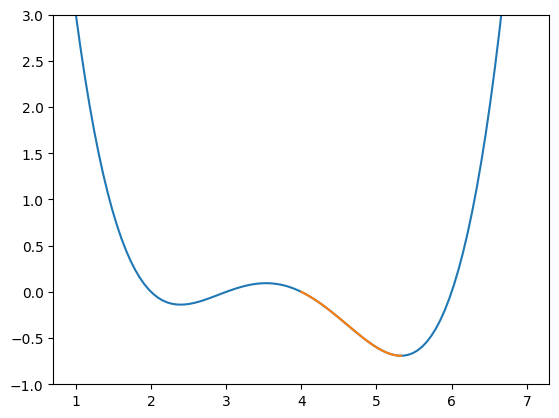

In [96]:
trajectory = gradient_descent(derivative_arbitrary, 4, .1, 200)
plot_arbitrary()
plt.plot(trajectory, arbitrary(trajectory));

In [97]:
model = LinearRegression(fit_intercept = False)
df = sns.load_dataset("tips")
model.fit(df[["total_bill"]], df["tip"])
model.coef_

array([0.1437319])

In [98]:
def mse_loss(theta1, x, y_obs):
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2)    

In [99]:
x = df["total_bill"]
y_obs = df["tip"]
mse_loss(0.147, x, y_obs)

1.1831403511422127

In [100]:
def mse_single_arg(theta1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2) 

In [101]:
mse_single_arg(0.1437)

1.1781165940051925

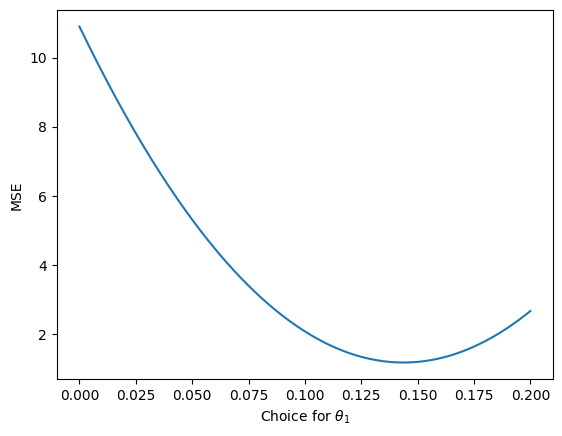

In [102]:
theta1s = np.linspace(0, 0.2, 200)
x = df["total_bill"]
y_obs = df["tip"]

MSEs = [mse_single_arg(theta1) for theta1 in theta1s]

plt.plot(theta1s, MSEs)
plt.xlabel(r"Choice for $\theta_1$")
plt.ylabel(r"MSE");

In [104]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]
simple_minimize(mse_single_arg, np.linspace(0, 0.2, 21))

0.14

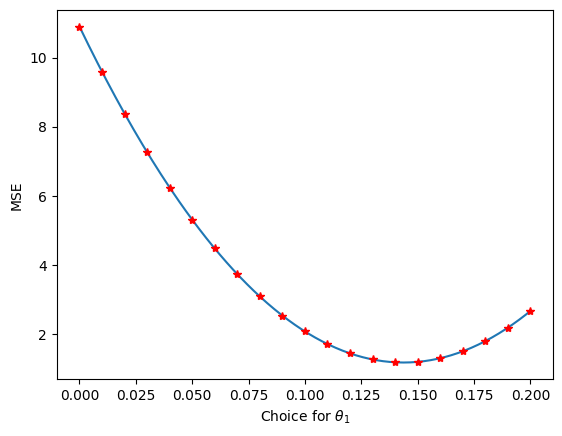

In [105]:
theta1s = np.linspace(0, 0.2, 200)
sparse_theta1s = np.linspace(0, 0.2, 21)

loss = [mse_single_arg(theta1) for theta1 in theta1s]
sparse_loss = [mse_single_arg(theta1) for theta1 in sparse_theta1s]

plt.plot(theta1s, loss)
plt.plot(sparse_theta1s, sparse_loss, 'r*')
plt.xlabel(r"Choice for $\theta_1$")
plt.ylabel(r"MSE");

In [106]:
import scipy.optimize
from scipy.optimize import minimize
minimize(mse_single_arg, x0 = 0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.178116115451325
        x: [ 1.437e-01]
      nit: 1
      jac: [ 3.204e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [109]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

In [ ]:

def mse_single_arg(theta1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta1 * x
    return np.mean((y_hat - y_obs) ** 2) 

def mse_loss_derivative_single_arg(theta_1):
    """Returns the derivative of the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    
    return np.mean(2 * (y_hat - y_obs) * x)

In [111]:
gradient_descent(mse_loss_derivative_single_arg, 0.05, 0.0001, 100)

array([0.05      , 0.05881852, 0.06680736, 0.0740446 , 0.08060095,
       0.08654045, 0.09192116, 0.09679563, 0.10121151, 0.10521192,
       0.10883597, 0.11211906, 0.11509327, 0.11778766, 0.12022855,
       0.1224398 , 0.12444301, 0.12625776, 0.12790176, 0.1293911 ,
       0.13074031, 0.13196259, 0.13306988, 0.13407298, 0.13498172,
       0.13580495, 0.13655074, 0.13722636, 0.13783841, 0.13839289,
       0.13889519, 0.13935024, 0.13976248, 0.14013593, 0.14047425,
       0.14078073, 0.14105839, 0.14130992, 0.14153778, 0.14174421,
       0.14193122, 0.14210063, 0.1422541 , 0.14239314, 0.14251909,
       0.14263319, 0.14273656, 0.1428302 , 0.14291504, 0.14299189,
       0.14306151, 0.14312458, 0.14318172, 0.14323348, 0.14328037,
       0.14332285, 0.14336134, 0.1433962 , 0.14342778, 0.14345639,
       0.14348231, 0.1435058 , 0.14352707, 0.14354634, 0.1435638 ,
       0.14357961, 0.14359394, 0.14360692, 0.14361868, 0.14362933,
       0.14363898, 0.14364772, 0.14365564, 0.14366281, 0.14366

In [112]:
model = LinearRegression(fit_intercept = True)
X = df[["total_bill"]]
y = df["tip"]
model.fit(X, y)

LinearRegression()

In [114]:
model.coef_, model.intercept_

(array([0.10502452]), 0.920269613554674)

In [115]:
tips_with_bias = df.copy()
tips_with_bias["bias"] = 1
X = tips_with_bias[["bias", "total_bill"]]
X.head(5)

,bias,total_bill
0,1,16.99
1,1,10.34
2,1,21.01
3,1,23.68
4,1,24.59


In [116]:
model = LinearRegression(fit_intercept = False)
X = tips_with_bias[["bias", "total_bill"]]
y = df["tip"]
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [117]:
model.coef_

array([0.92026961, 0.10502452])

In [118]:
X @ np.array([1.5, 0.05]) 

0      2.3495
1      2.0170
2      2.5505
3      2.6840
4      2.7295
        ...  
239    2.9515
240    2.8590
241    2.6335
242    2.3910
243    2.4390
Length: 244, dtype: float64

In [119]:
def mse_loss(theta, X, y_obs):
    y_hat = X @ theta
    return np.mean((y_hat - y_obs) ** 2)    

In [120]:
mse_loss(np.array([1.5, 0.05]), X, y_obs)

1.5340521752049179

In [121]:
import plotly.graph_objects as go

uvalues = np.linspace(0, 2, 10)
vvalues = np.linspace(0, 0.2, 10)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))

def mse_loss_single_arg(theta):
    return mse_loss(theta, X, y_obs)

MSE = np.array([mse_loss_single_arg(t) for t in thetas.T])

loss_surface = go.Surface(x=u, y=v, z=np.reshape(MSE, u.shape))

ind = np.argmin(MSE)
optimal_point = go.Scatter3d(name = "Optimal Point",
    x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
    z = [MSE[ind]],
    marker=dict(size=10, color="red"))

fig = go.Figure(data=[loss_surface, optimal_point])
fig.update_layout(scene = dict(
    xaxis_title = "theta0",
    yaxis_title = "theta1",
    zaxis_title = "MSE"))
fig.show()

In [122]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""    
    x0 = X.iloc[:, 0]
    x1 = X.iloc[:, 1]
    dth0 = np.mean(-2 * (y_obs - theta[0]*x0 - theta[1]*x1) * x0)
    dth1 = np.mean(-2 * (y_obs - theta[0]*x0 - theta[1]*x1) * x1)
    return np.array([dth0, dth1])

In [123]:
X = tips_with_bias[["bias", "total_bill"]]
y_obs = tips_with_bias["tip"]
mse_gradient(np.array([0, 0]), X, y_obs)

array([  -5.99655738, -135.22631803])

In [124]:
def mse_gradient_single_arg(theta):
    """Returns the gradient of the MSE on our data for the given theta"""
    X = tips_with_bias[["bias", "total_bill"]]
    y_obs = tips_with_bias["tip"]
    return mse_gradient(theta, X, y_obs)
mse_gradient_single_arg(np.array([0, 0]))

array([  -5.99655738, -135.22631803])

In [125]:
guesses = gradient_descent(mse_gradient_single_arg, np.array([0, 0]), 0.001, 10000)
pd.DataFrame(guesses).tail(10)

,0,1
9990,0.888098,0.106378
9991,0.888108,0.106378
9992,0.888119,0.106377
9993,0.888130,0.106377
9994,0.888141,0.106376
9995,0.888151,0.106376
9996,0.888162,0.106375
9997,0.888173,0.106375
9998,0.888184,0.106375
9999,0.888194,0.106374


In [126]:
def mse_gradient(theta, X, y_obs):
    """Returns the gradient of the MSE on our data for the given theta"""
    n = len(X)
    return -2 / n * (X.T @ y_obs - X.T @ X @ theta)